In [1]:
push!(LOAD_PATH, pwd())
using LightGraphs, Distributions, PyPlot, TwoLevelGraphs,GraphGeneration,Epidemics

# Two Level Graph

#Generate random regular two level graph

1) generate internal edges: simple regular graph

2) generate external edges
- repeat m times (for m nodes per cluster)
- generate a random regular graph with a maximum allowable k which is divisible by m*r. Do this until there are m*r edges per supernode
- randomly distribute the edges on a supernode among subnodes of that supernode

3) How to avoid possible duplication of edges in step 2.3?

In [2]:
N = 400
m = 10
n = Int(N/m)
l = 8
r = 10

t = TwoLevel(N,m,l,r)

TwoLevelGraphs.TwoLevel(Number[0,0,0,0,0,0,0,0,0,0,0],400,10,40,0,10,8)

In [10]:
G = generate_regular_two_level_graph(t)
println(G)
for v in vertices(G)
    in_count = 0
    out_count = 0
    for w in neighbors(G,v)#[100]
        if same_cluster(v,w,clusters)
            in_count += 1
        else
            out_count += 1
        end
    end
    if in_count != l || out_count != r
        println("v: $v, in: $(in_count), out: $(out_count)")
    end
#     assert(in_count == l)
#     assert(out_count == r)
end
    
    

removing 9 duplicate edges
{400, 3600} undirected graph


In [4]:
G,clusters = make_two_level_random_graph(t)

({400, 3635} undirected graph,[[1,2,3,4,5,6,7,8,9,10],[11,12,13,14,15,16,17,18,19,20],[21,22,23,24,25,26,27,28,29,30],[31,32,33,34,35,36,37,38,39,40],[41,42,43,44,45,46,47,48,49,50],[51,52,53,54,55,56,57,58,59,60],[61,62,63,64,65,66,67,68,69,70],[71,72,73,74,75,76,77,78,79,80],[81,82,83,84,85,86,87,88,89,90],[91,92,93,94,95,96,97,98,99,100]  …  [301,302,303,304,305,306,307,308,309,310],[311,312,313,314,315,316,317,318,319,320],[321,322,323,324,325,326,327,328,329,330],[331,332,333,334,335,336,337,338,339,340],[341,342,343,344,345,346,347,348,349,350],[351,352,353,354,355,356,357,358,359,360],[361,362,363,364,365,366,367,368,369,370],[371,372,373,374,375,376,377,378,379,380],[381,382,383,384,385,386,387,388,389,390],[391,392,393,394,395,396,397,398,399,400]])

In [4]:
for i in 1:10
edges = get_regular_edges_for_supergraph(t)
if length(edges) - length(unique(edges)) > 0
        println(sort(edges))
        println(sort(remove_duplicate_superedges(edges)))
end
end

LoadError: LoadError: UndefVarError: t not defined
while loading In[4], in expression starting on line 1

In [7]:
tot_in_count = 0
tot_out_count = 0

for v in vertices(G)
    in_count = 0
    out_count = 0
    for w in neighbors(G,v)#[100]
        if same_cluster(v,w,clusters)
            in_count += 1
        else
            out_count += 1
        end
    end
    tot_in_count += in_count
    tot_out_count += out_count
#     if in_count != l || out_count != r
        println("v: $v, in: $(in_count), out: $(out_count)")
#     end
#     assert(in_count == l)
#     assert(out_count == r)
end

println("Tot: in: $(tot_in_count/length(vertices(G))), out: $(tot_out_count/length(vertices(G)))")
println("edges: $(length(collect(edges(G)))) should be $(N*(l+r)/2)")

v: 1, in: 0, out: 18
v: 2, in: 0, out: 20
v: 3, in: 0, out: 17
v: 4, in: 0, out: 18
v: 5, in: 0, out: 18
v: 6, in: 0, out: 22
v: 7, in: 0, out: 28
v: 8, in: 0, out: 18
v: 9, in: 0, out: 24
v: 10, in: 0, out: 23
v: 11, in: 0, out: 24
v: 12, in: 0, out: 24
v: 13, in: 0, out: 27
v: 14, in: 0, out: 22
v: 15, in: 0, out: 24
v: 16, in: 0, out: 18
v: 17, in: 0, out: 25
v: 18, in: 0, out: 23
v: 19, in: 0, out: 23
v: 20, in: 0, out: 19
v: 21, in: 0, out: 24
v: 22, in: 0, out: 26
v: 23, in: 0, out: 20
v: 24, in: 0, out: 17
v: 25, in: 0, out: 24
v: 26, in: 0, out: 19
v: 27, in: 0, out: 14
v: 28, in: 0, out: 20
v: 29, in: 0, out: 22
v: 30, in: 0, out: 20
v: 31, in: 0, out: 26
v: 32, in: 0, out: 26
v: 33, in: 0, out: 20
v: 34, in: 0, out: 19
v: 35, in: 0, out: 23
v: 36, in: 0, out: 16
v: 37, in: 0, out: 19
v: 38, in: 0, out: 14
v: 39, in: 0, out: 19
v: 40, in: 0, out: 20
v: 41, in: 0, out: 28
v: 42, in: 0, out: 18
v: 43, in: 0, out: 21
v: 44, in: 0, out: 16
v: 45, in: 0, out: 22
v: 46, in: 0, out: 

In [39]:
get_regular_edges_for_supergraph(10,5,2,3)

15


15-element Array{Any,1}:
 1=>2
 1=>2
 1=>2
 1=>2
 1=>2
 1=>2
 1=>2
 1=>2
 1=>2
 1=>2
 1=>2
 1=>2
 1=>2
 1=>2
 1=>2

# Specified Degree Distribution

In [2]:
mu = 10
sigma = 20

function get_gamma_params(mu,sigma)
    k = mu^2/sigma^2
    theta = sigma^2/mu
    return k,theta
end

k,theta = get_gamma_params(mu,sigma)

d = Gamma(k,theta)

Distributions.Gamma{Float64}(α=0.25, θ=40.0)

In [3]:
@time g= graph_from_gamma_distribution(2000,10,15)

  3.196963 seconds (9.34 M allocations: 290.976 MB, 11.80% gc time)


{2000, 10550} undirected graph

9.955248335183866


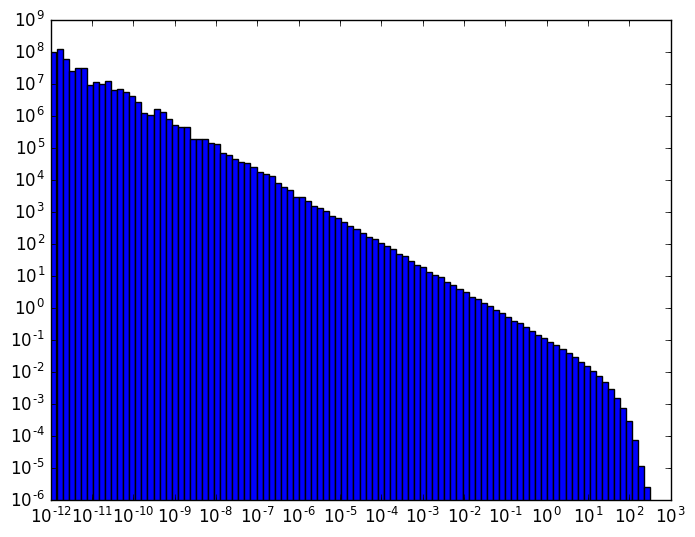

19.813793299182752


In [4]:
samples = rand(d,100000)
println(mean(samples))
println(std(samples))
bins = logspace(log10(minimum(samples)+1e-12),log10(maximum(samples)),100)

PyPlot.plt[:hist](samples,bins=bins,normed=true,log=true);
xscale("log")

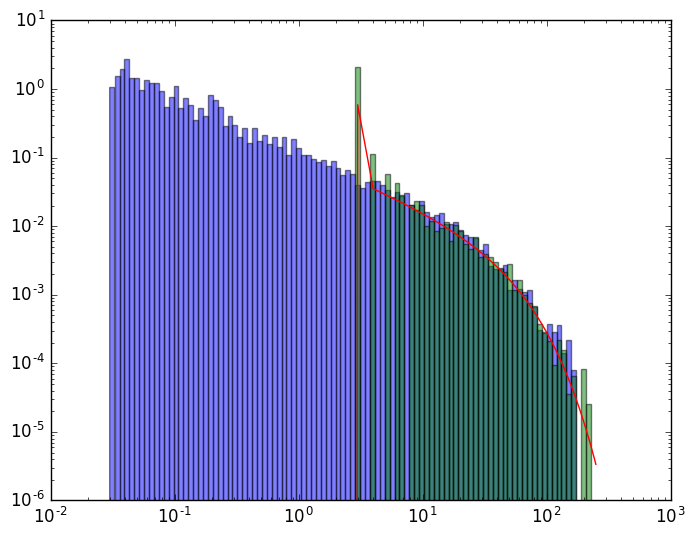

In [4]:
# g= graph_from_degree_distribution(d,10000)
g= graph_from_gamma_distribution(2000,mu,sigma)
p_k = get_p_k_gamma(sigma,mu,3)
ks = degree(g)
bins = logspace(log10(minimum(ks))-2,log10(maximum(ks)),100)
PyPlot.plt[:hist](rand(d,2000),bins=bins,normed=true,alpha=0.5,log=true);
PyPlot.plt[:hist](ks,bins=bins,normed=true,alpha=0.5,log=true);
k_range = 1:maximum(ks)
plot(k_range,[p_k(_) for _ in k_range])
xscale("log")

In [6]:
colors = ["a","b"]
repmat(colors,2)

4-element Array{ASCIIString,1}:
 "a"
 "b"
 "a"
 "b"

In [5]:
mean(ks)
# sum(ks .== 0)
# length(ks)

LoadError: LoadError: UndefVarError: ks not defined
while loading In[5], in expression starting on line 1

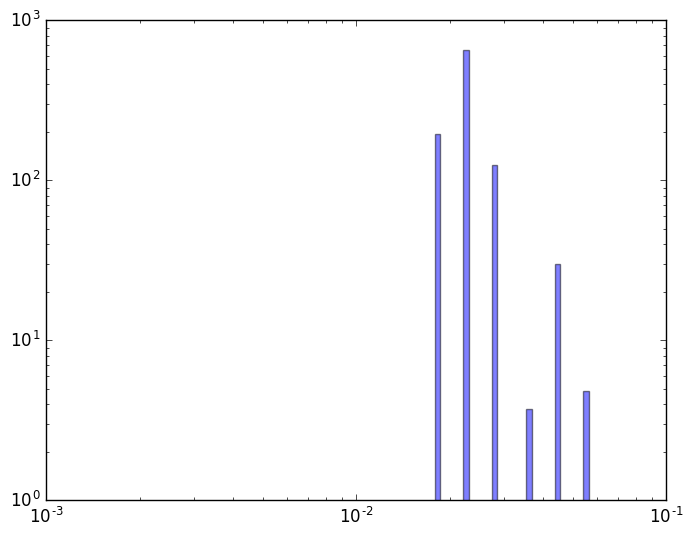

In [15]:
Cs = local_clustering_coefficient(g)
bins = logspace(log10(minimum(Cs)+1e-3),log10(maximum(Cs)),100)
# PyPlot.plt[:hist](rand(d,2000),bins=bins,normed=true,alpha=0.5,log=true);
PyPlot.plt[:hist](Cs,bins=bins,normed=true,alpha=0.5,log=true);
xscale("log")

In [16]:
mean(Cs)

0.004351515151515151